In [13]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

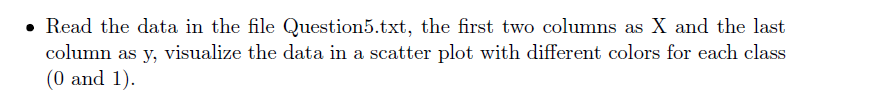

In [14]:
X = []  
y = []   

In [15]:
def loadDataSet():
    f=open('Question4.txt')
    # Read data line by line and use strip to remove the Spaces 
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T,mat(y)

In [16]:
X,y=loadDataSet()


In [17]:
X = np.array(X).T 
y = np.array(y).flatten()

In [18]:
#print(X[0])

[-0.017612 14.053064]


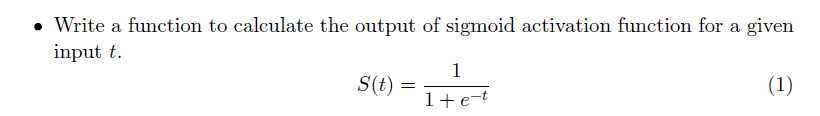

In [19]:
def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

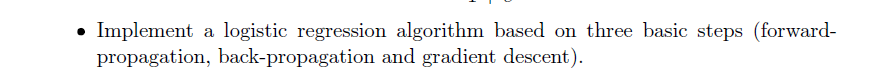

In [20]:
import numpy as np

def Logistic(X, y, W, b, n, alpha, iterations):
    '''
    X: input data (features)
    y: labels
    W: weights (initial)
    b: bias (initial)
    n: number of samples
    alpha: learning rate
    iterations: number of iterations
    '''
    J = np.zeros(iterations)  
    epsilon = 1e-8  # Sm
    
    for i in range(iterations):   
        # Step 1: Forward propagation
        Z = np.dot(X, W) + b
        y_hat = sigmoid(Z)
        
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  # Clip values to avoid log(0) and log(1)
        
        # Compute cost function 
        cost = (-1 / n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        J[i] = cost  # Store cost value
        
        # Step 2: Backpropagation
        dZ = y_hat - y.reshape(-1, 1)
        dW = (1 / n) * np.dot(X.T, dZ)
        db = (1 / n) * np.sum(dZ)
        
        # Step 3: Gradient descent 
        W = W - alpha * dW
        b = b - alpha * db
        
    return y_hat, W, b, J

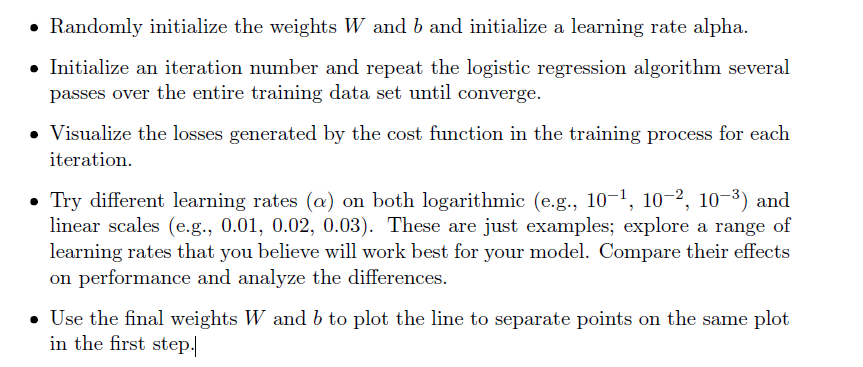

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plotBestFit(X, y, J, W, b, n, y_hat,J_dict):
    '''
    X: input data
    y: labels
    J_dict: Dictionary with learning rates as keys and corresponding cost values as values
    '''
    
    # Print parameters used in classification
    print("Parameters used in Classification:")
    for alpha, (W, b) in W_b_dict.items():
        print(f"Learning rate: {alpha}")
        print(f"Weights: {W.flatten()}")
        print(f"Bias: {b}")
        print()
        
    # Plot cost function figure
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    for alpha, J in J_dict.items():
        plt.plot(J, label=f"alpha = {alpha}")
    plt.title("Cost function over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    
    # Plot the final classification figure
    plt.subplot(1, 2, 2)
    
    
    # Decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    for alpha, (W, b) in W_b_dict.items():
        Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm', levels=[0, 0.5])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap='coolwarm', edgecolor='k', label='True Labels')
    
    plt.title("Logistic Regression Classification")
    plt.xlabel("Feature :X1")
    plt.ylabel("Feature :X2")
    plt.legend()
    
    plt.show()



In [54]:
num = X.shape[1]  # number of features
n = X.shape[0] # number of samples


In [55]:
alphas = [0.0005, 0.001, 0.002, 0.003,0.004]
iterations = 2000



In [56]:
J_dict = {}  # Dictionary to store cost values for different alphas
W_b_dict = {}  # Dictionary to store weights and bias for different alphas

for alpha in alphas:
    # Initialize weights and bias
    n_features = X.shape[1]  # Number of features
    W = np.random.randn(n_features, 1) * 0.01  # Small random initialization
    b = 0  # Initialize bias
    
    # Get the results from Logistic function
    y_hat, W, b, J = Logistic(X, y, W, b,n, alpha, iterations)
    
    # Store the results
    J_dict[alpha] = J
    W_b_dict[alpha] = (W, b)


In [57]:
# Get the results from Logistic function
y_hat,W,b,J = Logistic(X, y, W, b, n, alpha, iterations)

Parameters used in Classification:
Learning rate: 0.0005
Weights: [ 0.01764598 -0.13949018]
Bias: 0.18709049232901379

Learning rate: 0.001
Weights: [ 0.03946897 -0.16007716]
Bias: 0.3703924436732432

Learning rate: 0.002
Weights: [ 0.08289638 -0.19814314]
Bias: 0.7033628561085444

Learning rate: 0.003
Weights: [ 0.12698423 -0.23223539]
Bias: 0.9947002127715545

Learning rate: 0.004
Weights: [ 0.162289   -0.26270993]
Bias: 1.2525450351544019



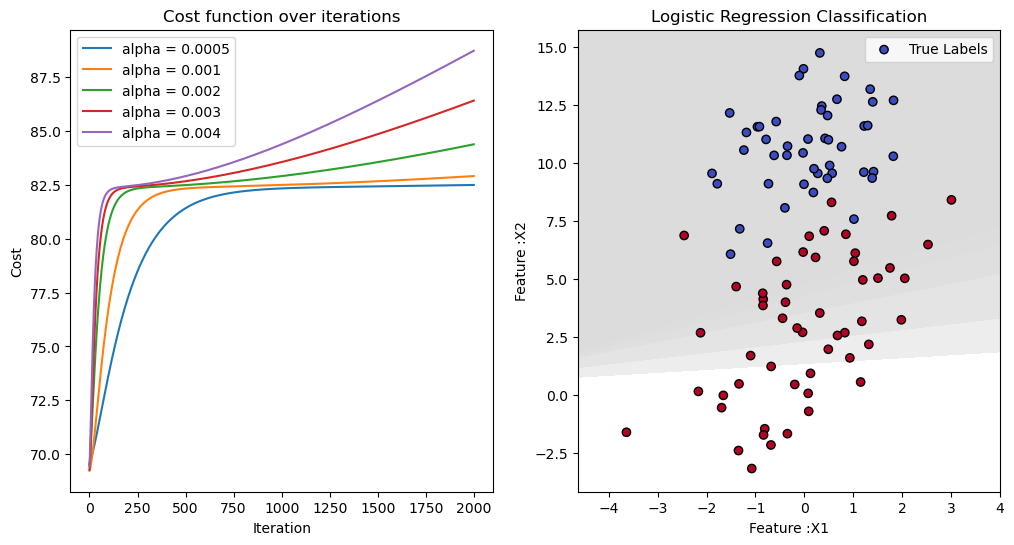

In [58]:
plotBestFit(X, y, J, W, b, n, y_hat,J_dict)